In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-57.43656096377315 -57.01908222306176
45.47127590813497 163.05973323841926
30.146411702158503 -114.86164057827523
67.55703840136022 -71.3977239007204
15.323654858655644 148.17135994155757
-89.6502438479576 -113.01382878554212
-82.2823043507855 132.77972070210683
-74.13706947068029 -77.27204377974498
40.09470259428875 -2.118696755224761
2.1284715465693864 -132.2953258779178
-49.60604405603544 151.36588075755884
-85.22754045722552 -36.16138766183772
15.570995413242713 177.00047810827084
44.375567549965496 -114.22333984791635
29.03094574775686 174.7313915030362
-50.79336495070082 -156.555280809187
26.262914533889045 -48.56523707749062
17.037266543744423 -119.48970273027459
67.1967322056247 124.4185243555064
-58.90612078965145 87.8152135206879
-13.173033422982456 176.5884885414613
-50.27332865946236 54.87256139409257
-39.66958549794883 -5.5917270255024505
27.848154185608678 101.55154843221356
-35.27667758761334 147.4927758527379
-80.75406011526029 -6.970132171699817
36.25599291494093 -61.5

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | san felipe
Processing Record 4 of Set 1 | clyde river
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | cuenca
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | hailey
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | codrington
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | asau
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | xichang
Processing Record 21 of Set 1 | wagga wagga
Processing Record 22 of Set 1 | hermanus
Processi

Processing Record 36 of Set 4 | bahia blanca
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | tymovskoye
Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | shingu
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | yeppoon
Processing Record 44 of Set 4 | clarence town
Processing Record 45 of Set 4 | helong
Processing Record 46 of Set 4 | lucapa
Processing Record 47 of Set 4 | santiago
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | churapcha
Processing Record 50 of Set 4 | qaanaaq
Processing Record 1 of Set 5 | sawakin
Processing Record 2 of Set 5 | itarema
Processing Record 3 of Set 5 | egvekinot
Processing Record 4 of Set 5 | northam
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 | akdepe
Processing Record 8 of Set 5 | tiksi
Pro

Processing Record 28 of Set 8 | korla
Processing Record 29 of Set 8 | vostok
Processing Record 30 of Set 8 | yazoo city
Processing Record 31 of Set 8 | oum hadjer
Processing Record 32 of Set 8 | nawashahr
Processing Record 33 of Set 8 | umm kaddadah
Processing Record 34 of Set 8 | kahului
Processing Record 35 of Set 8 | waipawa
Processing Record 36 of Set 8 | erzin
Processing Record 37 of Set 8 | bandarbeyla
Processing Record 38 of Set 8 | kasamwa
Processing Record 39 of Set 8 | chernyshevskiy
Processing Record 40 of Set 8 | husavik
Processing Record 41 of Set 8 | billings
Processing Record 42 of Set 8 | port blair
Processing Record 43 of Set 8 | mao
Processing Record 44 of Set 8 | sarigyukh
City not found. Skipping...
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | havelock
Processing Record 47 of Set 8 | dongsheng
Processing Record 48 of Set 8 | coihaique
Processing Record 49 of Set 8 | inuvik
Processing Record 50 of Set 8 | skjervoy
Processing Record 1 of 

Processing Record 18 of Set 12 | college
Processing Record 19 of Set 12 | impfondo
Processing Record 20 of Set 12 | saint-omer
Processing Record 21 of Set 12 | uribia
Processing Record 22 of Set 12 | karpathos
Processing Record 23 of Set 12 | palmas
Processing Record 24 of Set 12 | namibe
Processing Record 25 of Set 12 | touros
Processing Record 26 of Set 12 | cap malheureux
Processing Record 27 of Set 12 | oistins
Processing Record 28 of Set 12 | verkhovazhye
Processing Record 29 of Set 12 | terlizzi
Processing Record 30 of Set 12 | tamala
Processing Record 31 of Set 12 | manyana
Processing Record 32 of Set 12 | camargo
Processing Record 33 of Set 12 | qandahar
City not found. Skipping...
Processing Record 34 of Set 12 | bugas
Processing Record 35 of Set 12 | bushehr
Processing Record 36 of Set 12 | marystown
Processing Record 37 of Set 12 | portland
Processing Record 38 of Set 12 | murdochville
Processing Record 39 of Set 12 | barcelos
Processing Record 40 of Set 12 | alotau
City not

In [14]:
len(city_data)

552

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,49.46,87,96,10.60,AR,2023-01-06 04:02:02
1,Severo-Kurilsk,50.6789,156.1250,21.99,84,56,9.22,RU,2023-01-06 04:03:51
2,San Felipe,10.3399,-68.7425,70.63,98,91,2.51,VE,2023-01-06 04:03:52
3,Clyde River,70.4692,-68.5914,-24.48,92,27,2.21,CA,2023-01-06 04:02:59
4,Airai,-8.9266,125.4092,72.93,61,90,7.16,TL,2023-01-06 04:03:52
5,Punta Arenas,-53.1500,-70.9167,53.11,71,72,12.80,CL,2023-01-06 04:00:30
6,Hobart,-42.8794,147.3294,70.27,53,20,12.66,AU,2023-01-06 04:03:00
7,Cuenca,-2.8833,-78.9833,55.65,93,100,1.01,EC,2023-01-06 04:03:53
8,Atuona,-9.8000,-139.0333,78.44,79,18,17.11,PF,2023-01-06 04:03:54
9,Butaritari,3.0707,172.7902,81.46,72,71,13.69,KI,2023-01-06 04:03:54


In [16]:
# Reorder columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assign new DF with new column order.
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2023-01-06 04:02:02,-54.8000,-68.3000,49.46,87,96,10.60
1,Severo-Kurilsk,RU,2023-01-06 04:03:51,50.6789,156.1250,21.99,84,56,9.22
2,San Felipe,VE,2023-01-06 04:03:52,10.3399,-68.7425,70.63,98,91,2.51
3,Clyde River,CA,2023-01-06 04:02:59,70.4692,-68.5914,-24.48,92,27,2.21
4,Airai,TL,2023-01-06 04:03:52,-8.9266,125.4092,72.93,61,90,7.16
5,Punta Arenas,CL,2023-01-06 04:00:30,-53.1500,-70.9167,53.11,71,72,12.80
6,Hobart,AU,2023-01-06 04:03:00,-42.8794,147.3294,70.27,53,20,12.66
7,Cuenca,EC,2023-01-06 04:03:53,-2.8833,-78.9833,55.65,93,100,1.01
8,Atuona,PF,2023-01-06 04:03:54,-9.8000,-139.0333,78.44,79,18,17.11
9,Butaritari,KI,2023-01-06 04:03:54,3.0707,172.7902,81.46,72,71,13.69


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

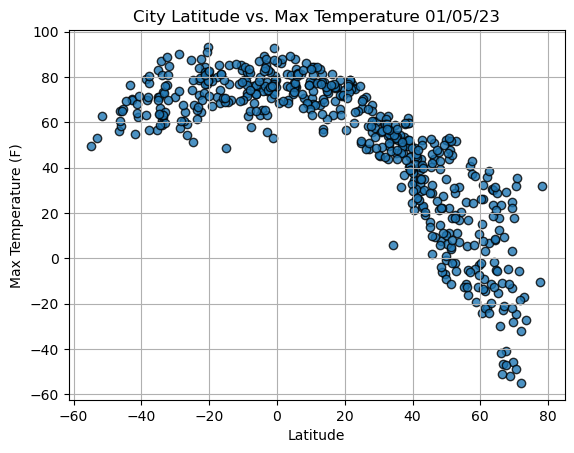

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

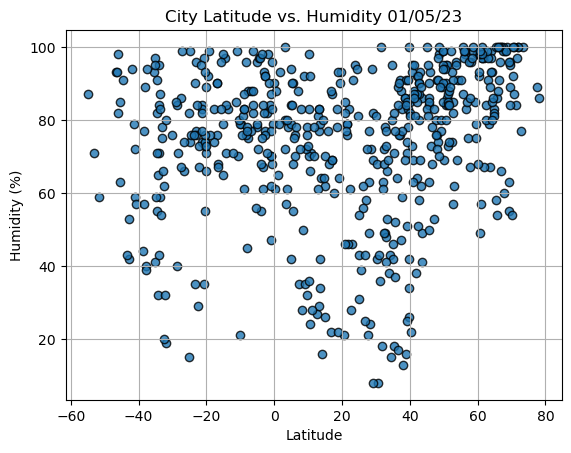

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

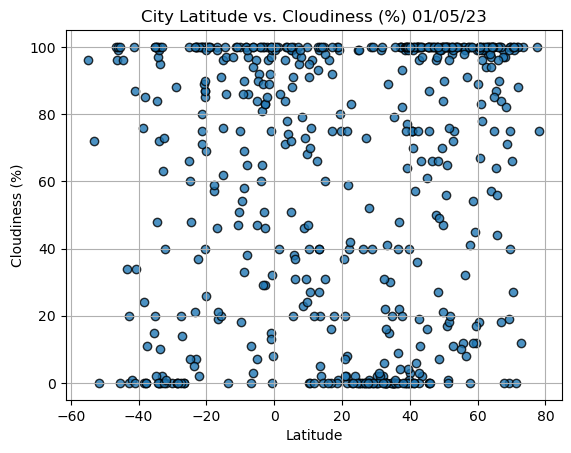

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

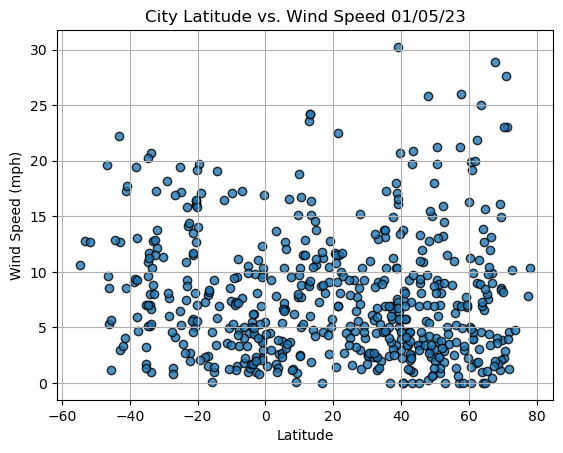

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [33]:
# Get specific row from current DF.
index13 = city_data_df.loc[13]
index13

City                 Constitucion
Country                        CL
Date          2023-01-06 04:03:56
Lat                      -35.3333
Lng                      -72.4167
Max Temp                     56.8
Humidity                       93
Cloudiness                     15
Wind Speed                   3.22
Name: 13, dtype: object

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Severo-Kurilsk,RU,2023-01-06 04:03:51,50.6789,156.1250,21.99,84,56,9.22
2,San Felipe,VE,2023-01-06 04:03:52,10.3399,-68.7425,70.63,98,91,2.51
3,Clyde River,CA,2023-01-06 04:02:59,70.4692,-68.5914,-24.48,92,27,2.21
9,Butaritari,KI,2023-01-06 04:03:54,3.0707,172.7902,81.46,72,71,13.69
10,Hailey,US,2023-01-06 04:03:55,43.5196,-114.3153,34.88,86,100,1.01


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

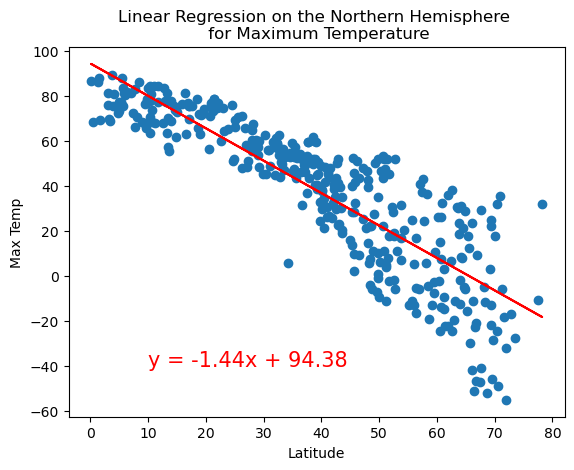

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-40))

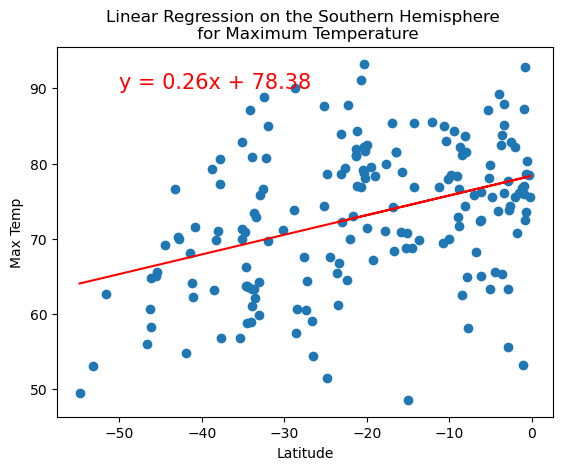

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

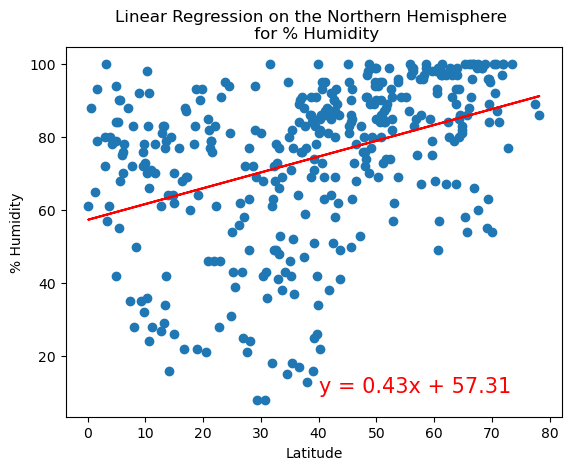

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

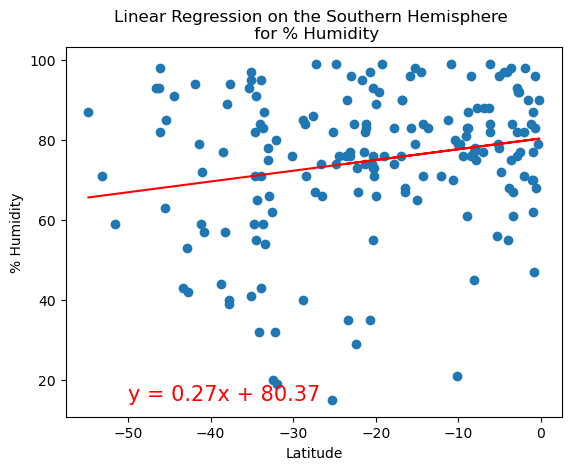

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50, 15))

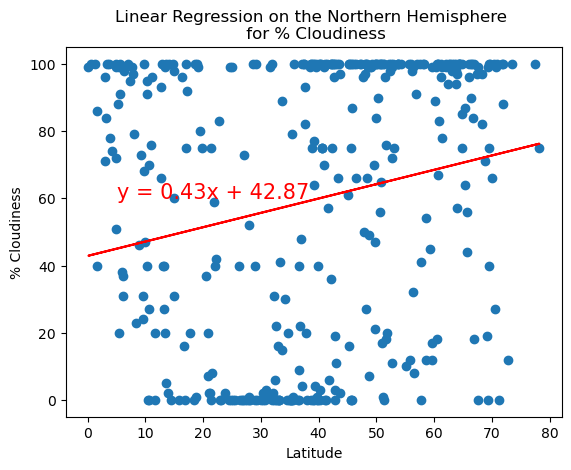

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(5, 60))

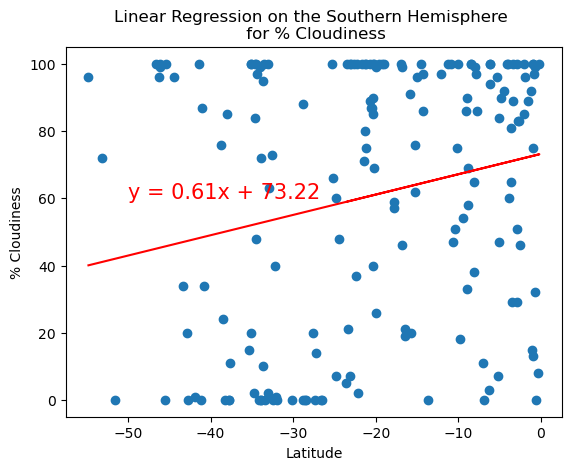

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

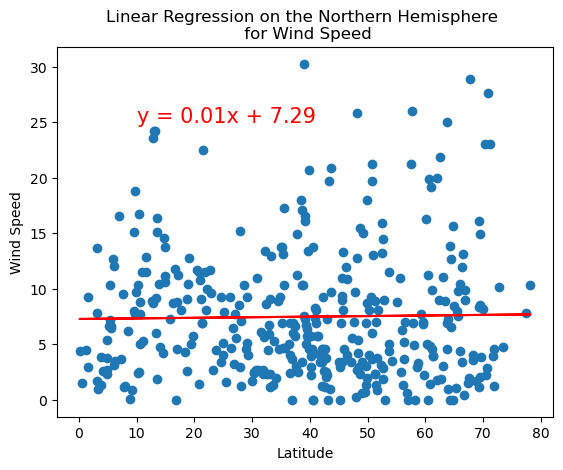

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

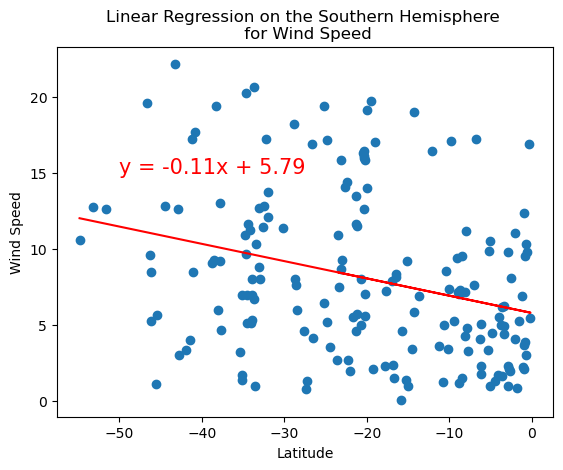

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,15))